<div style='background-image: url("../../share/images/header.svg") ; padding: 0px ; background-size: cover ; border-radius: 5px ; height: 250px'>
    <div style="float: right ; margin: 50px ; padding: 20px ; background: rgba(255 , 255 , 255 , 0.7) ; width: 50% ; height: 150px">
        <div style="position: relative ; top: 50% ; transform: translatey(-50%)">
            <div style="font-size: xx-large ; font-weight: 900 ; color: rgba(0 , 0 , 0 , 0.8) ; line-height: 100%">Computational Seismology</div>
            <div style="font-size: large ; padding-top: 20px ; color: rgba(0 , 0 , 0 , 0.5)">Discontinuous Galerkin Method with Physics based numerical flux - 1D Elastic Wave Equation </div>
        </div>
    </div>
</div>

This notebook is based on the paper [A new discontinuous Galerkin spectral element method for elastic waves with physically motivated numerical fluxes](https://www.geophysik.uni-muenchen.de/~gabriel/kduru_waves2017.pdf)
Published in the [13th International Conference on Mathematical and Numerical Aspects of Wave Propagation](https://cceevents.umn.edu/waves-2017)

##### Authors:
* Kenneth Duru
* Ashim Rijal ([@ashimrijal](https://github.com/ashimrijal))
* Sneha Singh

---

## Basic Equations ##

The source-free elastic wave equation in a heterogeneous 1D medium is 

\begin{align}
\rho(x)\partial_t v(x,t) -\partial_x \sigma(x,t) & = 0\\
\frac{1}{\mu(x)}\partial_t \sigma(x,t) -\partial_x v(x,t) & = 0  
\end{align}

with $\rho(x)$ the density, $\mu(x)$ the shear modulus and $x = [0, L]$. At the boundaries $ x = 0, x = L$ we pose the general well-posed linear boundary conditions

\begin{equation}
\begin{split}
B_0(v, \sigma, Z_{s}, r_0): =\frac{Z_{s}}{2}\left({1-r_0}\right){v} -\frac{1+r_0}{2} {\sigma} = 0,  \quad \text{at} \quad x = 0, \\
 B_L(v, \sigma, Z_{s}, r_n): =\frac{Z_{s}}{2} \left({1-r_n}\right){v} + \frac{1+r_n}{2}{\sigma} = 0, \quad \text{at} \quad  x = L.
 \end{split}
\end{equation}

with the reflection coefficients $r_0$, $r_n$ being real numbers and  $|r_0|, |r_n| \le 1$. 

Note that at $x = 0$,  while  $r_0 = -1$ yields a clamped wall, $r_0 = 0$  yields  an absorbing boundary, and  with $r_0 = 1$  we have a free-surface boundary condition. Similarly, at $x = L$, $r_n = -1$ yields a clamped wall, $r_n = 0$ yields an absorbing boundary, and  $r_n = 1$  gives a free-surface boundary condition.

1) Discretize the spatial domain $x$ into $K$ elements and denote the ${k}^{th}$ element $e^k = [x_{k}, x_{k+1}]$ and the element width $\Delta{x}_k = x_{k+1}-x_{k}$. Consider two adjacent elements  $e^k = [x_{k}, x_{k+1}]$ and  $e^{k+1} = [x_{k+1}, x_{k+2}]$ with an interface at $x_{k+1}$. At the interface we pose the physical conditions for a locked interface

\begin{align}
\text{force balance}:  \quad &\sigma^{-} = \sigma^{+} = \sigma, \nonumber \\
\text{no slip}: \quad & [\![ v]\!]  = 0,
\end{align}

where $[\![ v]\!] = v^{+} - v^{-}$, and $v^{-}, \sigma^{-}$ and $v^{+}, \sigma^{+}$ are the fields in $e^k = [x_{k}, x_{k+1}]$ and  $e^{k+1} = [x_{k+1}, x_{k+2}]$, respectively. 

2) Within the element derive the weak form of the equation by multiplying both sides by an arbitrary test function and integrating over the element.

3) Next map the $e^k = [x_{k}, x_{k+1}]$ to a reference element $\xi = [-1, 1]$

4) Inside the transformed  element  $\xi \in [-1, 1]$, approximate the solution  and material parameters by a polynomial interpolant,  and write 
\begin{equation}
v^k(\xi, t) = \sum_{j = 1}^{N+1}v_j^k(t) \mathcal{L}_j(\xi), \quad \sigma^k(\xi, t)  = \sum_{j = 1}^{N+1}\sigma_j^k(t) \mathcal{L}_j(\xi),
\end{equation}

\begin{equation}
\rho^k(\xi) = \sum_{j = 1}^{N+1}\rho_j^k \mathcal{L}_j(\xi), \quad \mu^k(\xi) = \sum_{j = 1}^{N+1}\mu_j^k \mathcal{L}_j(\xi),
\end{equation}

where $ \mathcal{L}_j$ is the $j$th interpolating polynomial of degree $N$. If we consider  nodal basis then the interpolating polynomials satisfy $ \mathcal{L}_j(\xi_i) = \delta_{ij}$.

The interpolating nodes $\xi_i$, $i = 1, 2, \dots, N+1$ are the nodes of a Gauss quadrature with

\begin{equation}
 \sum_{i = 1}^{N+1} f(\xi_i)w_i \approx \int_{-1}^{1}f(\xi) d\xi,
\end{equation}

where $w_i$ are quadrature weights.

5) At the element boundaries $\xi = \pm 1$, we generate $\widehat{v}^{k}(\pm 1, t)$ $\widehat{\sigma}^{k}(\pm 1, t)$ by solving a Riemann problem and constraining the solutions against interface and boundary conditions. Then numerical fluctuations $F^k(-1, t)$ and $G^k(1, t)$ are obtained by penalizing hat variables against the incoming characteristics only.

6) Finally, the flux fluctuations are appended to the semi-discrete PDE with special penalty weights and we have 


\begin{equation}
\begin{split}
\frac{d \boldsymbol{v}^k( t)}{ d t} &= \frac{2}{\Delta{x}_k} W^{-1}({\boldsymbol{\rho}}^{k})\left(Q \boldsymbol{\sigma}^k( t) - \boldsymbol{e}_{1}F^k(-1, t)- \boldsymbol{e}_{N+1}G^k(1, t)\right),
\end{split}
\end{equation}

\begin{equation}
\begin{split}
\frac{d \boldsymbol{\sigma}^k( t)}{ d t} &= \frac{2}{\Delta{x}_k} W^{-1}(1/{\boldsymbol{\mu}^{k}})\left(Q \boldsymbol{v}^k( t)  + \boldsymbol{e}_{1}\frac{1}{Z_{s}^{k}(-1)}F^k(-1, t)- \boldsymbol{e}_{N+1}\frac{1}{Z_{s}^{k}(1)}G^k(1, t)\right),
\end{split}
\end{equation}


where 
\begin{align}
\boldsymbol{e}_{1} = [ \mathcal{L}_1(-1), \mathcal{L}_2(-1), \dots,  \mathcal{L}_{N+1}(-1) ]^T, \quad  \boldsymbol{e}_{N+1} = [ \mathcal{L}_1(1), \mathcal{L}_2(1), \dots,  \mathcal{L}_{N+1}(1) ]^T,
\end{align}
and
\begin{align}
G^k(1, t):= \frac{Z_{s}^{k}(1)}{2} \left(v^{k}(1, t)-\widehat{v}^{k}(1, t) \right) + \frac{1}{2}\left(\sigma^{k}(1, t)- \widehat{\sigma}^{k}(1, t)\right), 
\end{align}
\begin{align}
F^{k}(-1, t):= \frac{Z_{s}^{k}(-1)}{2} \left(v^{k}(-1, t)-\widehat{v}^{k}(-1, t) \right) - \frac{1}{2}\left(\sigma^{k}(-1, t)- \widehat{\sigma}^{k}(-1, t)\right).
\end{align}

And the weighted elemental mass matrix $W^N(a)$ and the stiffness matrix $Q^N $ are defined by

\begin{align}
W_{ij}(a) = \sum_{m = 1}^{N+1} w_m \mathcal{L}_i(\xi_m)  {\mathcal{L}_j(\xi_m)} a(\xi_m), \quad Q_{ij} = \sum_{m = 1}^{N+1} w_m \mathcal{L}_i(\xi_m)  {\mathcal{L}_j^{\prime}(\xi_m)}.
\end{align}

7) Time extrapolation can be performed using any stable time stepping scheme like Runge-Kutta or ADER scheme.This notebook implements both Runge-Kutta and ADER schemes for solving the free source version of the elastic wave equation in a homogeneous media. To keep the problem simple, we use as spatial initial condition a Gauss function with half-width $\delta$

\begin{equation}
v(x,t=0)  = e^{-1/\delta^2 (x - x_{o})^2}, \quad \sigma(x,t=0) = 0
\end{equation}

**** Exercises****
1. Lagrange polynomial is used to interpolate the solution and the material parameters. First use polynomial degree 2 and then 6. Compare the simulation results in terms of accuracy of the solution (third and fourth figures give erros). At the end of simulation, time required to complete the simulation is also printed. Also compare the time required to complete both simulations.

2. We use quadrature rules: Gauss-Legendre-Lobatto and Gauss-Legendre. Run simulations once using Lobatto and once using Legendre rules. Compare the difference.

3. Now fix the order of polynomial to be 6, for example. Then use degree of freedom 100 and for another simulation 250. What happpens? Also compare the timre required to complete both simulations.

4. Experiment with the boundary conditions by changing the reflection coefficients $r_0$ and $r_n$.

5. You can also play around with sinusoidal initial solution instead of the Gaussian.

6. Change the time-integrator from RK to ADER. Observe if there are changes in the solution or the CFL number. Vary the polynomial order N.

In [1]:
# Parameters initialization and plotting the simulation
# Import necessary routines
import Lagrange
import numpy as np
import timeintegrate
import quadraturerules
import specdiff
import utils
import matplotlib.pyplot as plt
import timeit                         # to check the simulation time

#plt.switch_backend("TkAgg")          # plots in external window
plt.switch_backend("nbagg")           # plots within this notebook

points per wavelength:  4


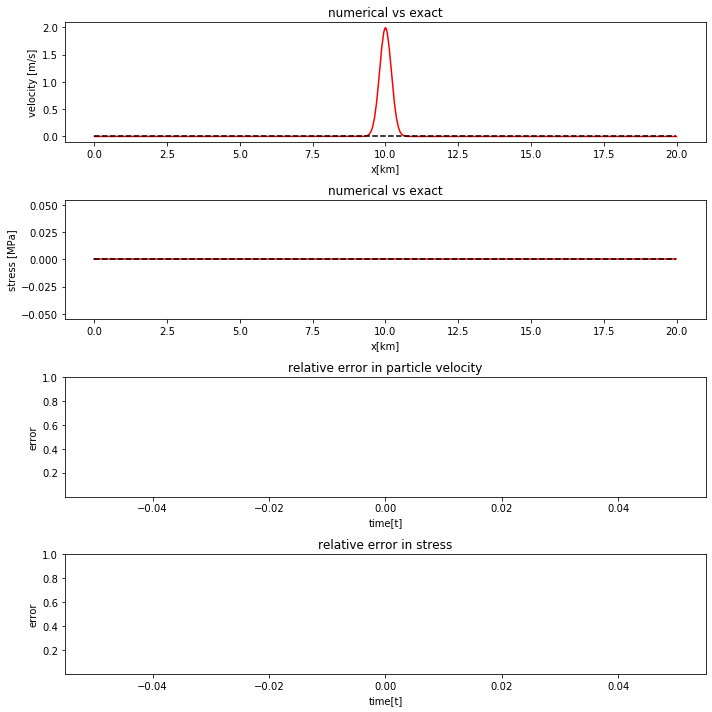

<Figure size 432x288 with 0 Axes>

total simulation time =  94.009917293
ploynomial degree =  4
degree of freedom =  400
maximum relative error in particle velocity =  0.00026628844582363175
maximum relative error in stress =  0.0003766045233679544


In [2]:
# Simulation start time
start = timeit.default_timer()

# Tic
iplot = 20

# Physical domain x = [ax, bx] (km)
ax = 0.0                     # (km)
bx = 20.0                    # (km)

# Choose quadrature rules and the corresponding nodes
# We use Gauss-Legendre-Lobatto (Lobatto) or  Gauss-Legendre (Legendre) quadrature rule.

#node = 'Lobatto'
node = 'Legendre'

if node not in ('Lobatto', 'Legendre'):
    print('quadrature rule not implemented. choose node = Legendre or node = Lobatto')
    exit(-1)

# Polynomial degree N: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
N = 4                        # Lagrange polynomial degree
NP = N+1                     # quadrature nodes per element

if N < 1 or N > 12: 
    print('polynomial degree not implemented. choose N>= 1 and N <= 12')
    exit(-1)

# Degrees of freedom to resolve the wavefield    
deg_of_freedom = 400 # = num_element*NP

# Estimate the number of elements needed for a given polynomial degree and degrees of freedom
num_element = round(deg_of_freedom/NP) # = deg_of_freedom/NP

# Initialize the mesh
y = np.zeros(NP*num_element)

# Generate num_element dG elements in the interval [ax, bx]
x0 = np.linspace(ax,bx,num_element+1)
dx = np.diff(x0)             # element sizes

# Generate Gauss quadrature nodes (psi): [-1, 1] and weights (w)
if node == 'Legendre':
    GL_return = quadraturerules.GL(N)
    psi = GL_return['xi']
    w = GL_return['weights'];
    
if node == 'Lobatto':
    gll_return = quadraturerules.gll(N)
    psi = gll_return['xi']
    w = gll_return['weights']

# Use the Gauss quadrature nodes (psi) generate the mesh (y)
for i in range (1,num_element+1):
    for j in range (1,(N+2)):
        y[j+(N+1)*(i-1)-1] = dx[i-1]/2.0 * (psi[j-1] + 1.0) +x0[i-1]

# Overide with the exact degrees of freedom        
deg_of_freedom = len(y);

# Generate the spectral difference operator (D) in the reference element: [-1, 1]  
D = specdiff.derivative_GL(N, psi, w)

# Boundary condition reflection coefficients 
r0 = 0                            # r=0:absorbing, r=1:free-surface, r=-1: clamped 
rn = 0                            # r=0:absorbing, r=1:free-surface, r=-1: clamped 

# Initialize the wave-fields
L = 0.5*(bx-ax)
delta = 0.01*(bx-ax)
x0 = 0.5*(bx+ax)

omega = 4.0
#u = np.sin(omega*np.pi*y/L)                                          # Sine function
u = 1/np.sqrt(2.0*np.pi*delta**2)*np.exp(-(y-x0)**2/(2.0*delta**2))   # Gaussian
    
u = np.transpose(u)
v = np.zeros(len(u))

U = np.zeros(len(u))
V = np.zeros(len(u))

print('points per wavelength: ', round(delta*deg_of_freedom/(2*L)))

# Material parameters
cs = 3.464                               # shear wave speed (km/s)
rho = 0*y  + 2.67                        # density (g/cm^3)
mu = 0*y + rho * cs**2                   # shear modulus (GPa)
Zs = rho*cs                              # shear impedance   

# Time stepping parameters
cfl = 0.5                                # CFL number
dt = (0.25/(cs*(2*N+1)))*min(dx)         # time-step (s)
t = 0.0                                  # initial time
Tend = 2                                # final time (s)
n = 0                                    # counter

# Difference between analyticla and numerical solutions
EV = [0]                                 # initialize errors in V (velocity)
EU = [0]                                 # initialize errors in U (stress)
T = [0]                                  # later append every time steps to this

# Initialize animated plot for velocity and stress
fig1 = plt.figure(figsize=(10,10))
ax1 = fig1.add_subplot(4,1,1)
line1 = ax1.plot(y, u, 'r', y, U, 'k--')
plt.title('numerical vs exact')
plt.xlabel('x[km]')
plt.ylabel('velocity [m/s]')

ax2 = fig1.add_subplot(4,1,2)
line2 = ax2.plot(y, v, 'r', y, V, 'k--')
plt.title('numerical vs exact')
plt.xlabel('x[km]')
plt.ylabel('stress [MPa]')

# Initialize error plot (for velocity and stress)
ax3 = fig1.add_subplot(4,1,3)
line3 = ax3.plot(T, EV, 'r')
plt.title('relative error in particle velocity')
plt.xlabel('time[t]')
ax3.set_ylim([10**-5, 1])
plt.ylabel('error')

ax4 = fig1.add_subplot(4,1,4)
line4 = ax4.plot(T, EU, 'r') 
plt.ylabel('error')
plt.xlabel('time[t]')
ax4.set_ylim([10**-5, 1])
plt.title('relative error in stress')

plt.tight_layout()
plt.ion()
plt.show()

A = (np.linalg.norm(1/np.sqrt(2.0*np.pi*delta**2)*0.5*Zs*(np.exp(-(y+cs*(t+1*0.5)-x0)**2/(2.0*delta**2))\
                                               - np.exp(-(y-cs*(t+1*0.5)-x0)**2/(2.0*delta**2)))))
B = (np.linalg.norm(u))

# Loop through time and evolve the wave-fields using ADER time-stepping scheme of N+1 order of accuracy
time_integrator = 'ADER'

for t in utils.drange (0.0, Tend+dt,dt):
    n = n+1
    
    # ADER time-integrator
    if time_integrator  in ('ADER'):
        ADER_Wave_dG_return = timeintegrate.ADER_Wave_dG(u,v,D,NP,num_element,dx,w,psi,t,r0,rn,dt,rho,mu)
        u = ADER_Wave_dG_return['Hu']
        v = ADER_Wave_dG_return['Hv']
     
    # Runge-Kutta time-integrator
    if time_integrator  in ('RK'):
        RK4_Wave_dG_return = timeintegrate.RK4_Wave_dG(u,v,D,NP,num_element,dx,w,psi,t,r0,rn,dt,rho,mu)
        u = RK4_Wave_dG_return['Hu']
        v = RK4_Wave_dG_return['Hv']

    # Analytical sine wave (use it when sine function is choosen above)
    #U = 0.5*(np.sin(omega*np.pi/L*(y+cs*(t+1*dt))) + np.sin(omega*np.pi/L*(y-cs*(t+1*dt))))
    #V = 0.5*Zs*(np.sin(omega*np.pi/L*(y+cs*(t+1*dt))) - np.sin(omega*np.pi/L*(y-cs*(t+1*dt))))
    
    # Analytical Gaussian
    U =  1/np.sqrt(2.0*np.pi*delta**2)*0.5*(np.exp(-(y+cs*(t+1*dt)-x0)**2/(2.0*delta**2))\
                                            + np.exp(-(y-cs*(t+1*dt)-x0)**2/(2.0*delta**2)))
    V =  1/np.sqrt(2.0*np.pi*delta**2)*0.5*Zs*(np.exp(-(y+cs*(t+1*dt)-x0)**2/(2.0*delta**2))\
                                               - np.exp(-(y-cs*(t+1*dt)-x0)**2/(2.0*delta**2)))
    EV.append(np.linalg.norm(V-v)/A)
    EU.append(np.linalg.norm(U-u)/B)
    
    T.append(t)

    # Updating plots
    if n % iplot == 0: 
        for l in line1:
            l.remove()
            del l               
        for l in line2:
            l.remove()
            del l
        for l in line3:
            l.remove()
            del l               
        for l in line4:
            l.remove()
            del l 

        # Display lines
        line1 = ax1.plot(y, u, 'r', y, U, 'k--')
        ax1.legend(iter(line1),('Numerical', 'Analytical'))
        line2 = ax2.plot(y, v, 'r', y, V, 'k--')
        ax2.legend(iter(line2),('Numerical', 'Analytical'))
        line3 = ax3.plot(T, EU, 'k--')
        ax3.set_yscale("log")#, nonposx='clip')
        line4 = ax4.plot(T, EV, 'k--')
        ax4.set_yscale("log")#, nonposx='clip')
        plt.gcf().canvas.draw()
       
plt.ioff()
plt.show()

# Simulation end time
stop = timeit.default_timer()
print('total simulation time = ', stop - start)                   # print the time required for simulation
print('ploynomial degree = ', N)                                  # print the polynomial degree used
print('degree of freedom = ', deg_of_freedom)                     # print the degree of freedom
print('maximum relative error in particle velocity = ', max(EU))  # max. relative error in particle velocity
print('maximum relative error in stress = ', max(EV))             # max. relative error in stress